In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings ("ignore")

import os
os.chdir("C:/Users/odela/Downloads")

In [13]:
prima= pd.read_csv("diabetes.csv")
prima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
col_names=["pregnant", "glucose", "BP", "skin","insulin", "BMI","pedigree","Age", "label"]
prima= pd.read_csv("diabetes.csv", header= None, names=col_names)
prima.head()

,pregnant,glucose,BP,skin,insulin,BMI,pedigree,Age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [79]:
df= prima.iloc[1:]
df

,pregnant,glucose,BP,skin,insulin,BMI,pedigree,Age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [97]:
# Selección características 

feature_cols= ["pregnant","insulin", "BMI","Age","glucose", "BP","pedigree"]
x=df[feature_cols]
y=df.label

In [23]:
# Creación base de entrenamiento y prueba

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=.2, random_state=1)

In [25]:
# sag: Stochastic Average Gradient
# newton-cgb: Newton
# liblinear: Library for large linear classifications (Algoritmo coordiante descent)
# saga: variante del método sag
# lbfgs: Limited-memory Broyden-Fletcher-Goldfarb-Shanno Algorythm

# Regresión logística con solucionador SAG

In [28]:
model= LogisticRegression( solver= "sag")
clf= model.fit(x_train, y_train)

In [30]:
# Predicción de etiquetas de clase sobre datos de prueba

y_predict= clf.predict(x_test)

# Impresión de coeficientes de la regresión de puntajes

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos de cada variable (Beta 1, Beta2,....,Beta 7", clf.coef_)

Intercepto (Beta 0) [-0.01187999]
Pesos de cada variable (Beta 1, Beta2,....,Beta 7 [[ 0.05171432  0.00116679 -0.00942072 -0.00225975  0.01407773 -0.03083477
   0.00100798]]


In [32]:
# Evaluación de precisión del modelo

score= model.score(x_test, y_test)
print("Score de precisión:",score)

Score de precisión: 0.6428571428571429


In [38]:
# Reporte de calsificación

print( classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.89      0.76        99
           1       0.50      0.20      0.29        55

    accuracy                           0.64       154
   macro avg       0.58      0.54      0.52       154
weighted avg       0.61      0.64      0.59       154



# Regresión logística con solucionador: Newton-cg

In [48]:
model= LogisticRegression( solver= "newton-cg")
clf= model.fit(x_train, y_train)

y_predict= clf.predict(x_test)

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos de cada variable (Beta 1, Beta2,....,Beta 7", clf.coef_)
print("------------------------------------------------------------------------------------------------------------------")
score= model.score(x_test, y_test)

print("Score de precisión:",score)
print("------------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_predict))


Intercepto (Beta 0) [-8.09039853]
Pesos de cada variable (Beta 1, Beta2,....,Beta 7 [[ 0.12709255 -0.0009588   0.08544661  0.01165698  0.03653224 -0.01510504
   0.63074257]]
------------------------------------------------------------------------------------------------------------------
Score de precisión: 0.7727272727272727
------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



# Regresión logística con solucionador: liblinear

In [52]:
model= LogisticRegression( solver= "liblinear")
clf= model.fit(x_train, y_train)

y_predict= clf.predict(x_test)

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos de cada variable (Beta 1, Beta2,....,Beta 7", clf.coef_)
print("------------------------------------------------------------------------------------------------------------------")
score= model.score(x_test, y_test)

print("Score de precisión:",score)
print("------------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_predict))

Intercepto (Beta 0) [-5.37998517]
Pesos de cada variable (Beta 1, Beta2,....,Beta 7 [[ 1.18842024e-01 -3.17159489e-04  5.28253775e-02  3.80510423e-03
   2.87926631e-02 -1.90993839e-02  4.74826699e-01]]
------------------------------------------------------------------------------------------------------------------
Score de precisión: 0.7662337662337663
------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



# Regresión logística con solucionador: saga

In [57]:
model= LogisticRegression( solver= "saga")
clf= model.fit(x_train, y_train)

y_predict= clf.predict(x_test)

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos de cada variable (Beta 1, Beta2,....,Beta 7", clf.coef_)
print("------------------------------------------------------------------------------------------------------------------")
score= model.score(x_test, y_test)

print("Score de precisión:",score)
print("------------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_predict))

Intercepto (Beta 0) [-0.00610789]
Pesos de cada variable (Beta 1, Beta2,....,Beta 7 [[ 0.03024581  0.00115489 -0.00937949  0.00092794  0.01387862 -0.0308575
   0.00052799]]
------------------------------------------------------------------------------------------------------------------
Score de precisión: 0.6493506493506493
------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.89      0.77        99
           1       0.52      0.22      0.31        55

    accuracy                           0.65       154
   macro avg       0.60      0.55      0.54       154
weighted avg       0.62      0.65      0.60       154



# Regresión logística con solucionador: lbfgs

In [61]:
model= LogisticRegression( solver= "lbfgs")
clf= model.fit(x_train, y_train)

y_predict= clf.predict(x_test)

print("Intercepto (Beta 0)", clf.intercept_)
print("Pesos de cada variable (Beta 1, Beta2,....,Beta 7", clf.coef_)
print("------------------------------------------------------------------------------------------------------------------")
score= model.score(x_test, y_test)

print("Score de precisión:",score)
print("------------------------------------------------------------------------------------------------------------------")
print(classification_report(y_test, y_predict))

Intercepto (Beta 0) [-8.10386732]
Pesos de cada variable (Beta 1, Beta2,....,Beta 7 [[ 0.12715688 -0.00096268  0.08559416  0.01168204  0.03657091 -0.01508633
   0.63352539]]
------------------------------------------------------------------------------------------------------------------
Score de precisión: 0.7727272727272727
------------------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.90      0.84        99
           1       0.75      0.55      0.63        55

    accuracy                           0.77       154
   macro avg       0.77      0.72      0.73       154
weighted avg       0.77      0.77      0.76       154



In [99]:
# Predicción de probabilidades para casos particulares (los 5 son ceros, ya que no son mayores de .5)

y_pred_probs= clf.predict_proba(x_test)[:,1]
y_pred_probs[0:5]

array([0.4365067 , 0.31967427, 0.15787816, 0.04340148, 0.19968388])

In [101]:
y_test[0:5]

286    0
102    0
582    0
353    0
727    0
Name: label, dtype: object

In [103]:
# conversión de valores de texto a numéricos para poder graficar 
y_test= y_test.to_numpy()
y_test[0:5]

array(['0', '0', '0', '0', '0'], dtype=object)

In [109]:
# valores ya numéricos
y_test= [int(numeric_string) for numeric_string in y_test]
y_test[0:5]

[0, 0, 0, 0, 0]

In [111]:

y_pred_probs= np.round(y_pred_probs,0)
y_pred_probs[0:5]

array([0., 0., 0., 0., 0.])

In [117]:
# Graficación de la curva ROC y cálculo del área bajo ella

import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# fpr = false positive rate
# tpr= true positive rate
# thresholds= límites para valores de p
fpr, tpr, thesholds=roc_curve( y_test, y_pred_probs)
auc= roc_auc_score(y_test, y_pred_probs)

Text(0.5, 1.0, 'Curva ROC para regresión logísitica')

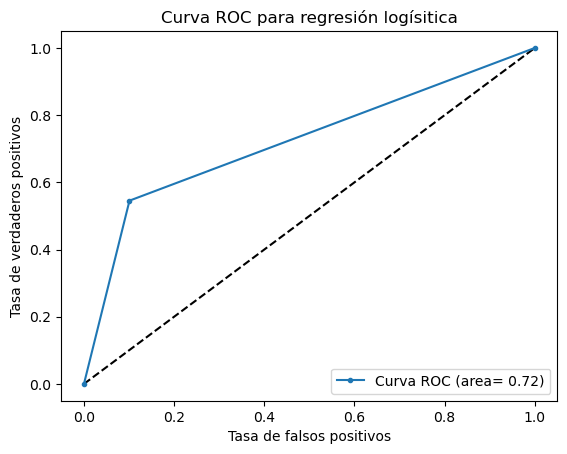

In [121]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr, marker=".", label= "Curva ROC (area= %.2f)" %auc)
plt.xlabel("Tasa de falsos positivos")#False positive rate
plt.ylabel("Tasa de verdaderos positivos")#true positive rate
plt.legend( loc="lower right")
plt.title("Curva ROC para regresión logísitica")